### Using Lasso for Feature Selection

In [1]:
from sklearn import datasets
import pandas as pd
df = pd. read_csv( 'https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')
df. head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#Train test split
from sklearn.model_selection import train_test_split
X = df. drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
485,0,135,68,42,250,42.3,0.365,24
547,4,131,68,21,166,33.1,0.160,28
18,1,103,30,38,83,43.3,0.183,33


In [ ]:
#Scaling the features with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#what is the difference between fit_transform and transform?
# fit_transform fits the scaler to the data and then transforms it.
# transform only applies the transformation using the already fitted scaler.

#why we fit only on training data?
# Fitting only on training data prevents data leakage from the test set into the training process.


#why we need to transfom only test data?
# Transforming only the test data ensures that the test set is scaled in the same way as the training set, maintaining consistency.

#transform to DataFrame
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.836294,-0.800051,-0.535764,-0.157146,-0.189732,-1.060153,-0.614216,-0.948610
1,0.390728,-0.490543,0.128044,0.553619,2.130203,0.646467,-0.909738,-0.434667
2,-1.143050,0.437979,-0.093226,1.393614,1.478536,1.355371,-0.306991,-0.777296
3,0.083972,0.314176,-0.093226,0.036699,0.748669,0.147609,-0.906812,-0.434667
4,-0.836294,-0.552445,-2.195284,1.135154,0.027491,1.486650,-0.839515,-0.006380


In [16]:
#Let's use Lasso for feature selection
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [17]:
lasso.coef_

array([ 0.0227641 ,  0.17490696, -0.01391824, -0.        , -0.00028007,
        0.1090188 ,  0.0151197 ,  0.06668597])

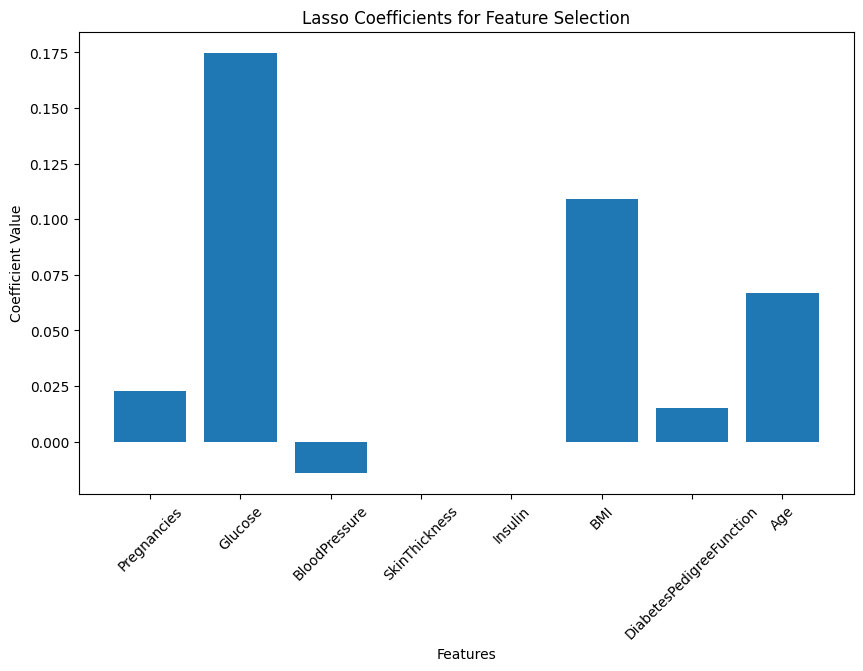

In [22]:
#Let's plot the coefficients in bar chart
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,6))
plt.bar(X.columns, lasso.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients for Feature Selection')
plt.xticks(rotation=45)
plt.show()

### Feature Selection using decision tree

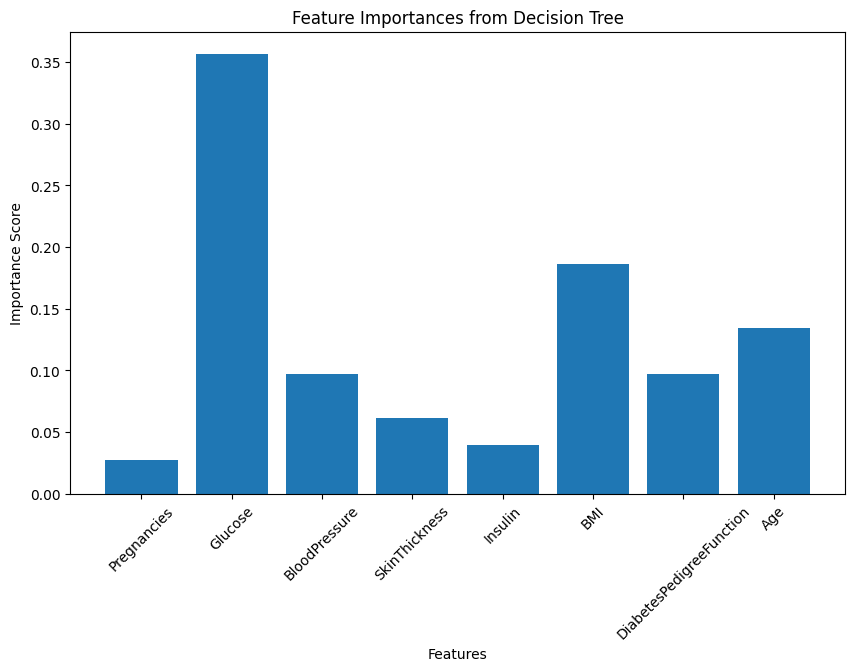

In [19]:
# Import decision tree classifier for feature selection
from sklearn.tree import DecisionTreeClassifier
# Initialize the model
dt_classifier = DecisionTreeClassifier(random_state=42)
# Fit the model
dt_classifier.fit(X_train, y_train)
# Get feature importances
importances = dt_classifier.feature_importances_
# Create a bar chart of feature importances
plt.figure(figsize=(10,6))
plt.bar(X.columns, importances)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances from Decision Tree')
plt.xticks(rotation=45)
plt.show()

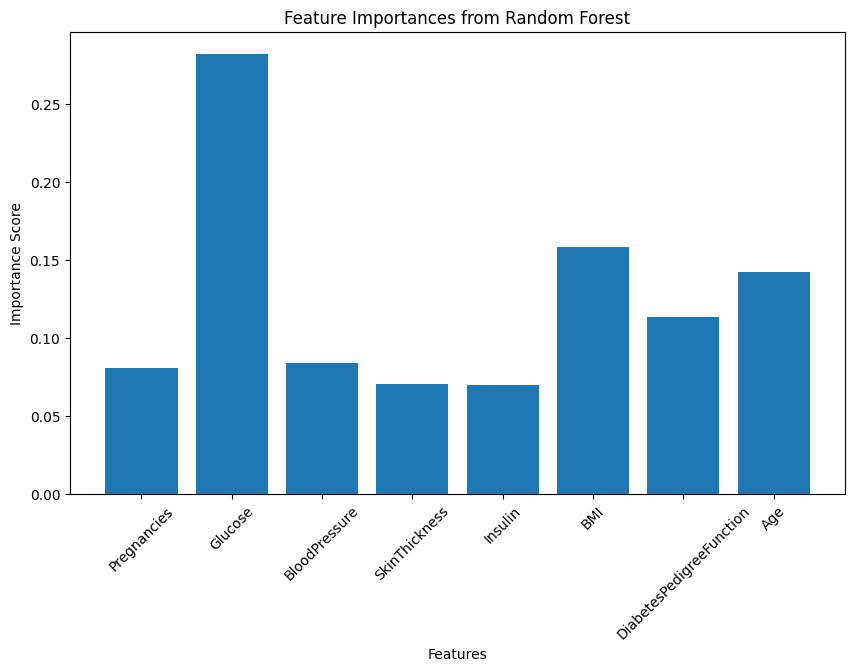

In [23]:
# Let's do same thing with random forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
importances_rf = rf_classifier.feature_importances_
plt.figure(figsize=(10,6))
plt.bar(X.columns, importances_rf)
plt.xlabel('Features')
plt.ylabel('Importance Score')  
plt.title('Feature Importances from Random Forest')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:34:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


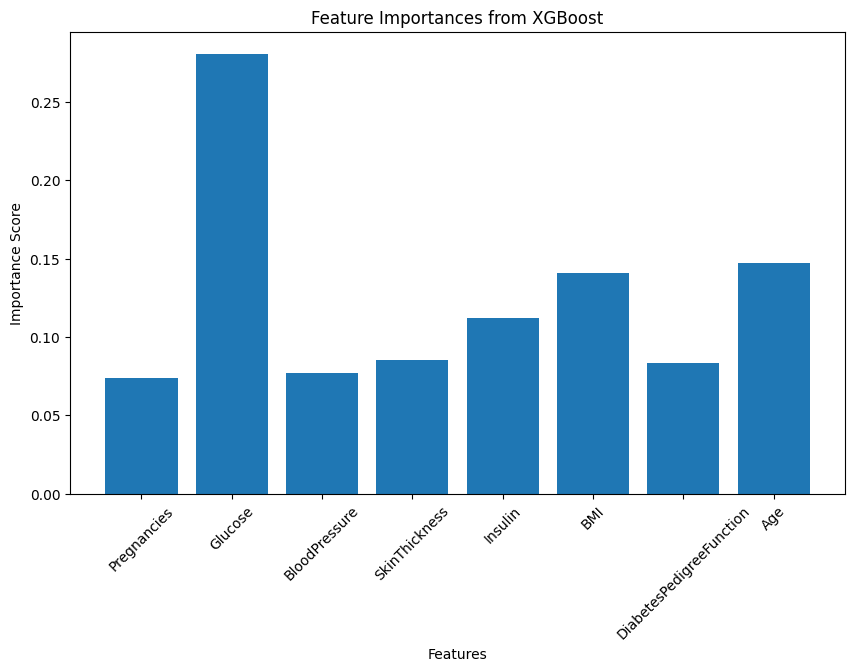

In [24]:
# ### Feature Selection using XGBoost
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)
importances_xgb = xgb_classifier.feature_importances_
plt.figure(figsize=(10,6))
plt.bar(X.columns, importances_xgb)
plt.xlabel('Features')      
plt.ylabel('Importance Score')  
plt.title('Feature Importances from XGBoost')
plt.xticks(rotation=45)
plt.show()